<a href="https://colab.research.google.com/github/allanacardoso/tech_challenge03/blob/main/Survival_Analysis_Churn_Telecon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import de bibliotecas

In [1]:
pip install scikit-survival

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.4
    Uninstalling osqp-1.0.4:
      Successfully uninstalled osqp-1.0.4


In [2]:
pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=a8f28e0eb51357c8b0361c50439a0b9aeb8fb5228ed86f5a03e83cd8e515dc5d
  Stored in directory: /root/.cache/pip/wheels/5d/7a/54/1460364da0fe4e17c256b7a28191fa373d81292fcf73a4ddb8
Successfully built upsetplot


In [5]:
pip install seaborn


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from upsetplot import plot
from upsetplot import UpSet

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sksurv.nonparametric import kaplan_meier_estimator

##Roteiro de Análise e trabalho com os Dados



*   Preparo dos dados:
  
  *   Carregamento
  *   Pré-Processamento: Dados ausentes, conversão de tipo de dados e qualidade dos dados

*   Exploratory Data Analysis (EDA)
  *   Análise de taxa de churn e distribuição da variável Tenure
  *   Visualizações

*   Análise de Sobreviência
  *   Definição da Variável de Tempo (Tenure)
  *   Definição da variável de Evento (Churn)

*   Modelagem
  *   Modelo de Análise de Sobrevivência Multivariado: Cox Proportional Hazards Model
  *   Preparação dos dados e divisão em dataset de treinamento e teste
  *   Treinamento
  *   Validação e explicabilidade do modelo utilizado



## Preparo dos dados

###Carregamento

In [7]:
customer = pd.read_excel("/content/drive/MyDrive/Case A3Data/Customer-Churn.xlsx")
customer = pd.DataFrame(customer)
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


###Pré-Processamento: Verificação de dados ausentes, conversão de tipo de dados e qualidade dos dados

In [8]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
trat_cols = customer.select_dtypes(include="object").columns
for i in trat_cols:
    customer[i] = customer[i].astype("category")

customer['SeniorCitizen'] = customer['SeniorCitizen'].astype("category")

customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

##Tratamento de dados ausentes
### Verificação da existência de dados ausentes no dataset

In [11]:
customer.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##### Foram encontrados valores ausentes apenas na coluna "TotalCharges". Há duas formas para resolver esse tipo de problema que pode ser a remoção das linhas ausentes, uma vez que não representa um número expressivo diante da quantidade de dados do dataset ou o tratamento e população da coluna. Neste caso, vamos optar pelo tratamento e assim, a coluna será populada com o valor mensal multiplicado pela quantidade de meses (tenure)

In [12]:
customer[customer['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2531,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3343,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4023,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4315,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
4583,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5484,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
5549,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
6213,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
6429,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
6562,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No


In [13]:
df_verify = customer[customer['TotalCharges'].notnull()]

In [14]:
df_verify['calc_total'] = df_verify['MonthlyCharges'] * df_verify['tenure']

#Diferença entre o valor real e o calculado utilizando o valor absoluto de Total Charges
df_verify['calc_erro'] = df_verify['TotalCharges'] - df_verify['calc_total']
df_verify['calc_dif'] = abs(df_verify['TotalCharges'] - df_verify['calc_total'])
df_verify['calc_dif_percent'] = (df_verify['calc_dif'] / df_verify['TotalCharges'])*100

/tmp/ipython-input-2305292686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verify['calc_total'] = df_verify['MonthlyCharges'] * df_verify['tenure']
/tmp/ipython-input-2305292686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verify['calc_erro'] = df_verify['TotalCharges'] - df_verify['calc_total']
/tmp/ipython-input-2305292686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [15]:
df_verify[['TotalCharges', 'MonthlyCharges', 'tenure', 'calc_total', 'calc_erro', 'calc_dif', 'calc_dif_percent']].describe()

,TotalCharges,MonthlyCharges,tenure,calc_total,calc_erro,calc_dif,calc_dif_percent
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,2283.300441,64.798208,32.421786,2283.147248,0.153193,45.089157,3.214793
std,2266.771362,30.085974,24.545260,2264.703327,67.255326,49.899711,4.002725
min,18.800000,18.250000,1.000000,18.800000,-370.850000,0.000000,0.000000
25%,401.450000,35.587500,9.000000,397.800000,-28.650000,9.437500,0.722129
50%,1397.475000,70.350000,29.000000,1394.575000,0.000000,28.650000,1.995528
75%,3794.737500,89.862500,55.000000,3791.250000,28.700000,63.700000,4.209919
max,8684.800000,118.750000,72.000000,8550.000000,373.250000,373.250000,45.062837


##### Para verificar se havia diferença entre os valores totais de "TotalCharges" e o valor a ser calculado para popular as linhas cujos dados estão ausentes, foi realizado um cálculo da diferença entre os valores reais e os encontrados em "TotalCharges", o que confirmou que seria possível utilizar a estratégia de preencher os dados nulos.

##### Há uma pequena diferença encontrada nos valores totais de "MonthlyCharges" para a variável "TotalCharges" que possivelmente pode ser explicada pela presença de Taxa, Impostos ou similares nas faturas, não sendo possível afirmar com 100% de certeza visto que não há essa variável no dataset

In [16]:
customer['TotalCharges'] = customer['TotalCharges'].fillna(customer['MonthlyCharges'] * customer['tenure'])

In [17]:
customer[customer['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Remoção da variável de identificação do cliente, pois não será utilizada em análise

In [18]:
customer = customer.drop('customerID', axis=1)

In [19]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

## Qualidade dos dados
### Verificação de outliers

In [20]:
df2 = customer.copy()

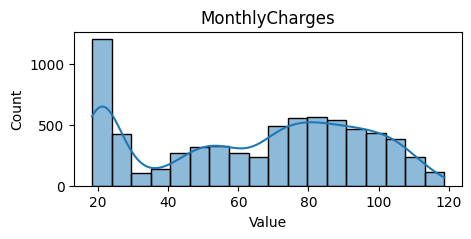

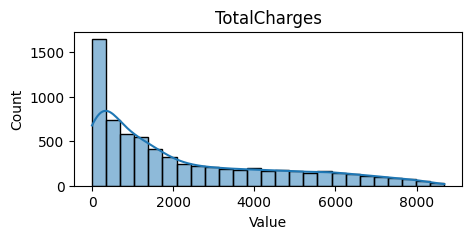

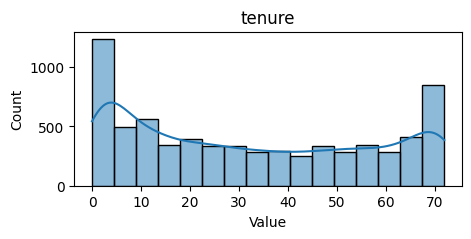

In [21]:
col_numeric = ['MonthlyCharges', 'TotalCharges', 'tenure']
for i in col_numeric:
  plt.figure(figsize=(5, 2))
  sns.histplot(data=df2, x=i, kde=True)
  plt.title(i)
  plt.xlabel("Value")
  plt.ylabel("Count")
  plt.show()

##### Não foi possível identificar nenhum outlier que venha a impactar o bom andamento da análise

##Exploratory Data Analisys (EDA)


###Taxa de Churn

In [22]:
taxa_churn = df2[df2['Churn'] == 'Yes'].shape[0] / customer.shape[0] * 100
print("Taxa de Churn:", taxa_churn)

Taxa de Churn: 26.536987079369588


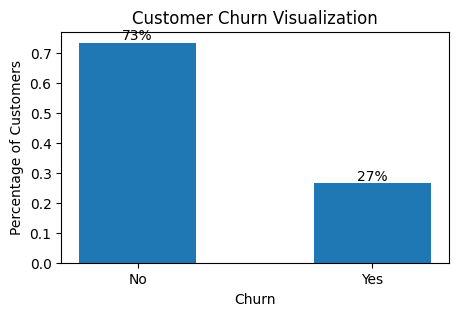

In [23]:
churn_counts = df2['Churn'].value_counts(normalize=True)

plt.figure(figsize=(5, 3))

plt.bar(churn_counts.index, churn_counts.values, width=0.5)

for i in range(len(churn_counts)):
    plt.text(i, churn_counts.values[i], '{:.0f}%'.format(churn_counts.values[i]*100), ha='center', va='bottom')

plt.xlabel("Churn")
plt.ylabel("Percentage of Customers")
plt.title("Customer Churn Visualization")
plt.show()

##### A taxa de Churn verificada equivale a aproximadamente 27% (26,5% no total) de todo o dataset

Tratamento das colunas incluindo em "No" clientes que não possuem serviços de internet e de telefone

In [24]:
df2.replace('No internet service','No',inplace=True)
df2.replace('No phone service','No',inplace=True)

/tmp/ipython-input-3645768592.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2.replace('No internet service','No',inplace=True)
/tmp/ipython-input-3645768592.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2.replace('No phone service','No',inplace=True)


## Visualização de dados
### Verificação variáveis que possam influenciar ou não na movimentação do cliente

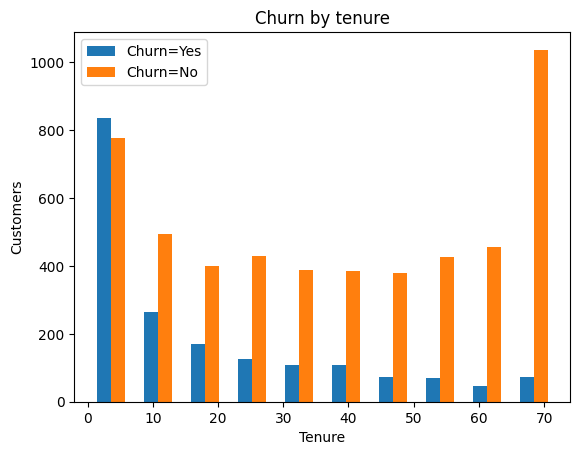

In [25]:
plt.hist(x = [df2[df2['Churn']=='Yes']['tenure'], df2[df2['Churn']=='No']['tenure']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.title("Churn by tenure")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

Observando a variável Tenure, percebe-se que uma tendência de clientes com até 1 ano de contrato a realizarem o Churn. À medida em que o tempo de contrato aumenta, os clientes tendem a cancelar menos os seus contratos

### Agrupando o tempo de contrato para Maior que um ano e Menor do que um ano

In [26]:
df2['time_contract'] = df2['tenure'].apply(lambda x:'Less than one year' if x <= 12 else 'Greater than one year')

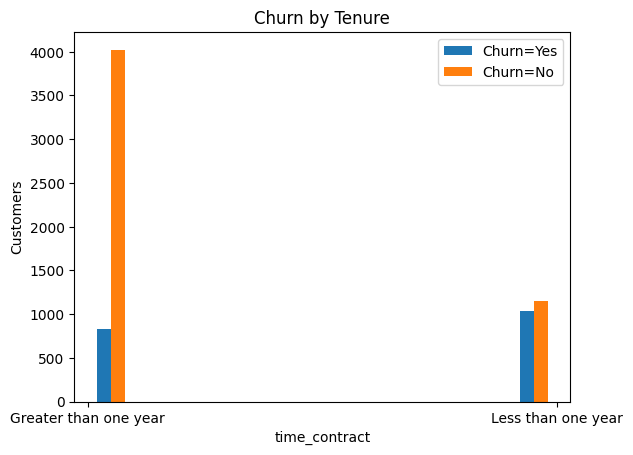

In [27]:
plt.hist(x = [df2[df2['Churn']=='Yes']['time_contract'], df2[df2['Churn']=='No']['time_contract']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("time_contract")
plt.ylabel("Customers")
plt.title("Churn by Tenure")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

In [28]:
print("Less than one year:", df2[df2['Churn']=='Yes']['time_contract'].value_counts(normalize=True)['Less than one year']*100, "%")
print("Greater than one year:", df2[df2['Churn']=='Yes']['time_contract'].value_counts(normalize=True)['Greater than one year']*100, "%")

Less than one year: 55.48421615837347 %
Greater than one year: 44.515783841626536 %


### Agrupando as faixas de idades para Senior e Not Senior

In [29]:
df2['Age'] = df2['SeniorCitizen'].apply(lambda x: "Senior" if x == 1 else "Not Senior")

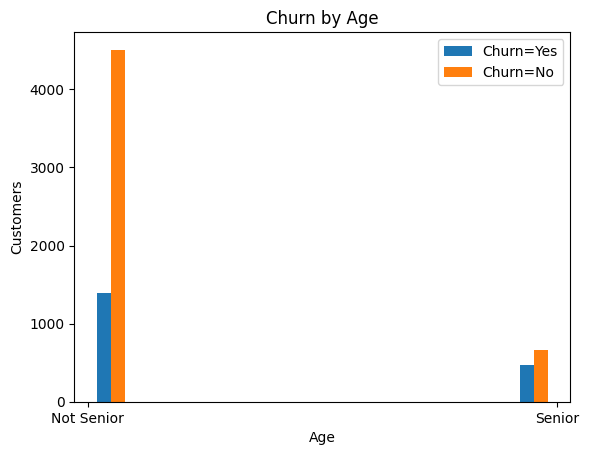

In [30]:
plt.hist(x = [df2[df2['Churn']=='Yes']['Age'], df2[df2['Churn']=='No']['Age']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Age")
plt.ylabel("Customers")
plt.title("Churn by Age")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

##### Ao analisar o Churn por senioridade, percebeu-se que pessoas mais jovens tendem a permanecer com os contratos ativos

In [31]:
print("Seniores:", df2[df2['Churn']=='Yes']['Age'].value_counts(normalize=True)['Senior']*100, "%")
print("Não Seniores:", df2[df2['Churn']=='Yes']['Age'].value_counts(normalize=True)['Not Senior']*100, "%")

Seniores: 25.468164794007492 %
Não Seniores: 74.53183520599251 %


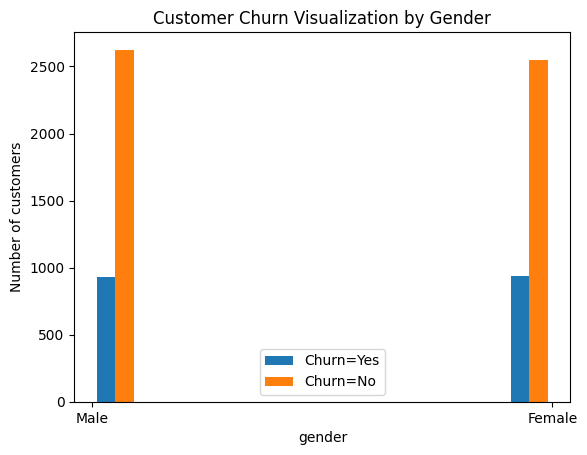

In [32]:
plt.hist(x = [df2[df2['Churn']=='Yes']['gender'], df2[df2['Churn']=='No']['gender']], bins = 10, histtype = 'bar', rwidth = 0.8)
plt.xlabel("gender")
plt.ylabel("Number of customers")
plt.title("Customer Churn Visualization by Gender")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

##### Aparentemente o gênero não exerce influência para a permanência ou não dos clientes e, há uma boa distribuição entre Homens e Mulheres. Não se sabe a idade do dataset que está sendo analisado, mas não é existem e não são consideradas outras identidades de gênero na base

##### Agrupando por clientes Solteiros e sem Filho (Singles) x Clientes Casados Com filhos (Not Single)

In [33]:
df2['Marital_Status'] = df2.apply(lambda x: "Single" if x['Partner'] == "No" and x['Dependents'] == "No" else "Not Single", axis=1)

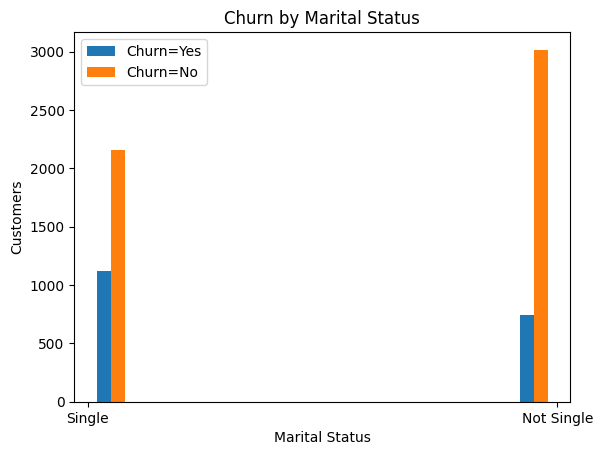

In [34]:
plt.hist(x = [df2[df2['Churn']=='Yes']['Marital_Status'], df2[df2['Churn']=='No']['Marital_Status']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Marital Status")
plt.ylabel("Customers")
plt.title("Churn by Marital Status")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

##### **Clientes solteiros sem filhos tem maior probabilidade de cancelamento de contrato?:**

##### Foi criada uma uma coluna de Estado Civil baseada nas colunas "Partner" e "Dependents". Apesar de não ser muito expressiva a diferença, constatou-se que pessoas casadas com dependentes tendem a permanecer com o contrato ativo. Uma hipótese é de que pessoas com família constituída tendem a manter os serviços devido a uma rotina já estabelecida na família. Aqui pode ser uma boa estratégia segmentar o público por dados demográficos e oferecer serviços baseados na necessidade desses clientes

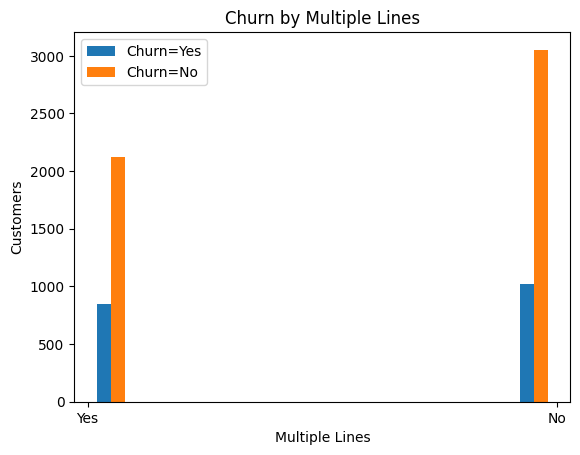

In [35]:
plt.hist(x = [df2[df2['Churn']=='Yes']['MultipleLines'], df2[df2['Churn']=='No']['MultipleLines']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Multiple Lines")
plt.ylabel("Customers")
plt.title("Churn by Multiple Lines")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

#####  Aparentemente o fato dos clientes terem ou não múltiplas linhas telefônicas não implica no Churn ou permanência dos mesmos

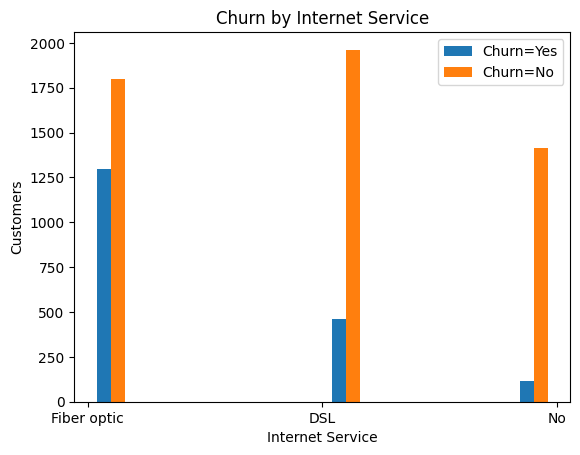

In [36]:
plt.hist(x = [df2[df2['Churn']=='Yes']['InternetService'], df2[df2['Churn']=='No']['InternetService']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Internet Service")
plt.ylabel("Customers")
plt.title("Churn by Internet Service")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

In [37]:
print("Fiber optic:", df2[df2['Churn']=='Yes']['InternetService'].value_counts(normalize=True)['Fiber optic']*100, "%")
print("DSL:", df2[df2['Churn']=='Yes']['InternetService'].value_counts(normalize=True)['DSL']*100, "%")

Fiber optic: 69.39539860888175 %
DSL: 24.558587479935795 %


Há um alto número de clientes com distribuição de internet Fibra ótica que fizeram o churn, representados em cerca de 60% do dataset, o que pode indicar que a distribuição desse serviço não está satisfatória

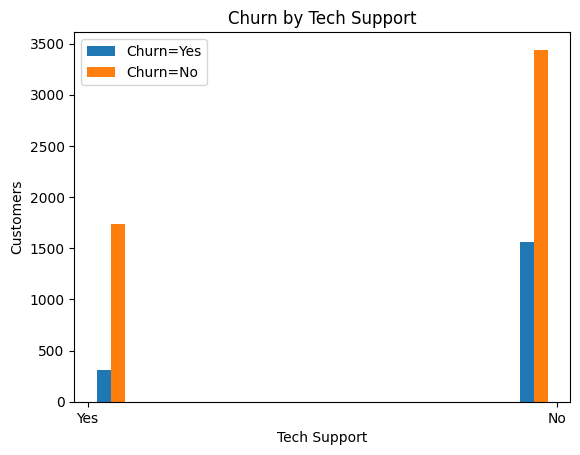

In [38]:
plt.hist(x = [df2[df2['Churn']=='Yes']['TechSupport'], df2[df2['Churn']=='No']['TechSupport']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Tech Support")
plt.ylabel("Customers")
plt.title("Churn by Tech Support")
plt.legend(['Churn=Yes', 'Churn=No'])
plt.show()

In [39]:
print("Has support:", df2[df2['Churn']=='Yes']['TechSupport'].value_counts(normalize=True)['Yes']*100, "%")
print("No support:", df2[df2['Churn']=='Yes']['TechSupport'].value_counts(normalize=True)['No']*100, "%")

Has support: 16.586409844836812 %
No support: 83.41359015516319 %


##### Há um alto número de clientes que não receberam suporte técnico que fizeram o churn, representando 83,4% da base.
##### Não dados suficientes para validar, mas há a hipótese de que existe uma dificuldade do cliente em utilizar os serviços ofertados e/ou alta necessidade de reparação técnica.
##### Entre aqueles que receberam suporte, a taxa de permanência é maior.
##### Em se tratando de serviços tecnológicos, o suporte técnico e bom atendimento do cliente pode aumentar seu nível de satisfação e assim contribuir para a sua permanência com o contrato

### Agrupando clientes que receberam e que não receberam suporte técnico e verificando por tipo Serviço de Internet

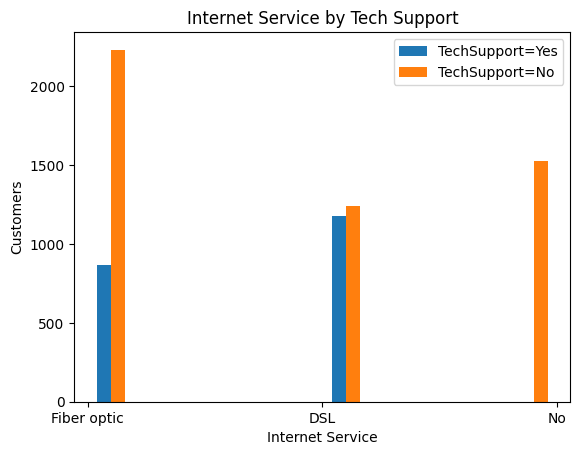

In [40]:
plt.hist(x = [df2[df2['TechSupport']=='Yes']['InternetService'], df2[df2['TechSupport']=='No']['InternetService']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Internet Service")
plt.ylabel("Customers")
plt.title("Internet Service by Tech Support")
plt.legend(['TechSupport=Yes', 'TechSupport=No'])
plt.show()

Agrupando por tipo de internet fornecida e por clientes que recebem ou não suporte técnico, verifica-se uma grande quantidade de clientes com Fibra Ótica sem nenhum suporte, o que pode ajudar a verificar a hipótese anterior

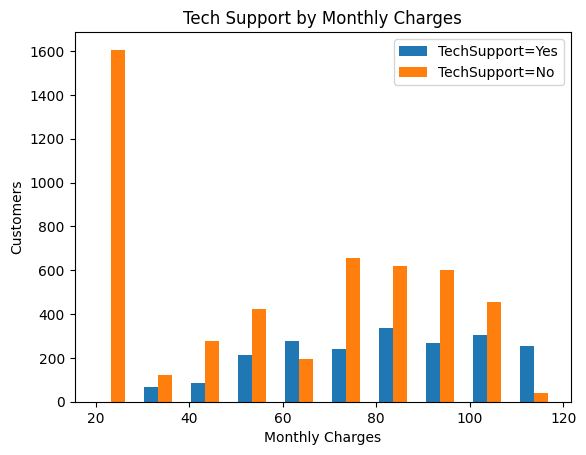

In [41]:
plt.hist(x = [df2[df2['TechSupport']=='Yes']['MonthlyCharges'], df2[df2['TechSupport']=='No']['MonthlyCharges']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.title("Tech Support by Monthly Charges")
plt.legend(['TechSupport=Yes', 'TechSupport=No'])
plt.show()

É possível verificar que os clientes cujo pacote de serviços com custos mensais entre 50 e 110 (reais) não recebem suporte técnico. Essa quantidade pode ser expressiva e determinar a satisfação do cliente.

Segundo estudos publicados pela [CX Trend 2023](https://cev.fgv.br/noticia/maioria-dos-consumidores-estao-dispostos-a-pagar-mais-caro-em-uma-marca-que-oferece-uma-boa), a maioria dos consumidores estão dispostos a pagar mais caro em uma marca que oferece uma boa experiência. Desta forma, há a possibilidade de uma investigação mais aprofundada sobre a satisfação do cliente e sua percepção acerca prestação de serviços da empresa

### Agrupando por cliente Fidelidade (contratos a partir de 1 ano) e clientes Mensais (que realizam pagamentos mensais sem fidelização)

In [42]:
df2['Contract'] = df2['Contract'].replace(['Two year', 'One year'], "Fidelity")
df2['Contract'] = df2['Contract'].replace('Month-to-month', "Monthly")
df2['Contract'].unique()

/tmp/ipython-input-3546967094.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['Contract'] = df2['Contract'].replace(['Two year', 'One year'], "Fidelity")
/tmp/ipython-input-3546967094.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['Contract'] = df2['Contract'].replace('Month-to-month', "Monthly")


['Fidelity', 'Monthly']
Categories (2, object): ['Monthly', 'Fidelity']

/tmp/ipython-input-242398183.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = df2.groupby(['Contract','Churn']).size().unstack()


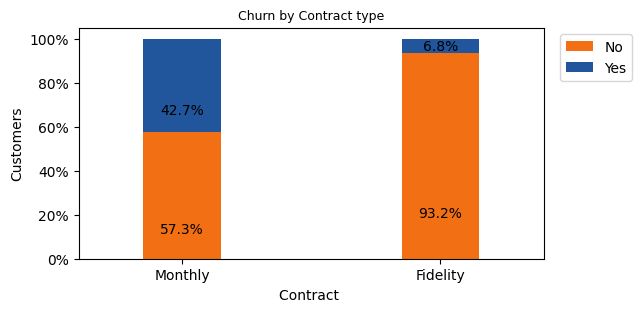

In [43]:
colors = ['#f27013','#21569c']

contract_churn = df2.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={1:'Yes', 0:'No'}, inplace=True)

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', figsize=(6,3),width=0.3, color=colors,stacked=True, rot=0)

plt.title('Churn by Contract type', fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='medium')
plt.xlabel('Contract \n', fontsize='medium')
plt.ylabel('Customers', fontsize='medium')
plt.xticks(fontsize='medium')
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

Verifica-se que um pouco mais da metade dos clientes que possuem contrato mensal tem uma tendência a cancelerarem seus contratos, enquanto aqueles com contratos de maior tempo, pernacecem. Aqui há a possibilidade de se trabalhar na oferta de contratos com tempo maior, tornando-os mais atrativos para os clientes

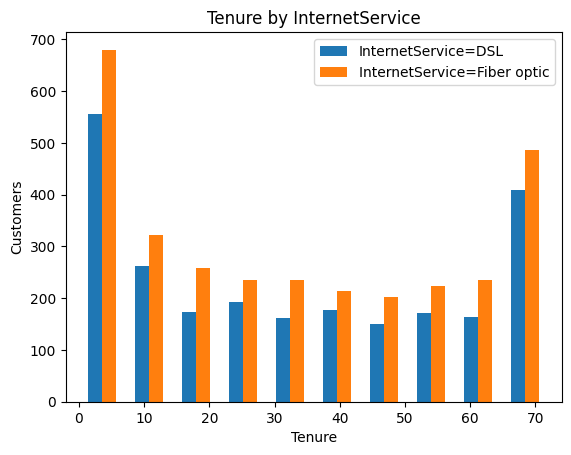

In [44]:
plt.hist(x = [df2[df2['InternetService']=='DSL']['tenure'], df2[df2['InternetService']=='Fiber optic']['tenure']], bins = 10, histtype = 'bar', rwidth = 0.6)
plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.title("Tenure by InternetService")
plt.legend(['InternetService=DSL', 'InternetService=Fiber optic'])
plt.show()

Aparentemente, se considerarmos somente o tipo de internet fornecida, ela não exerce grande influência no tempo de duração do contrato

### Agrupamento por métodos de pagamento por Automatic (Bank transfer e Credit card) e Eletronic (Electronic check e Mailed check)

In [45]:
df2['PaymentMethod'] = df2['PaymentMethod'].replace(['Bank transfer (automatic)', 'Credit card (automatic)'], 'Automatic')
df2['PaymentMethod'] = df2['PaymentMethod'].replace(['Electronic check', 'Mailed check'], 'Eletronic')

/tmp/ipython-input-4229762524.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['PaymentMethod'] = df2['PaymentMethod'].replace(['Bank transfer (automatic)', 'Credit card (automatic)'], 'Automatic')
/tmp/ipython-input-4229762524.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['PaymentMethod'] = df2['PaymentMethod'].replace(['Electronic check', 'Mailed check'], 'Eletronic')


/tmp/ipython-input-246989618.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_churn = df2.groupby(['PaymentMethod','Churn']).size().unstack()


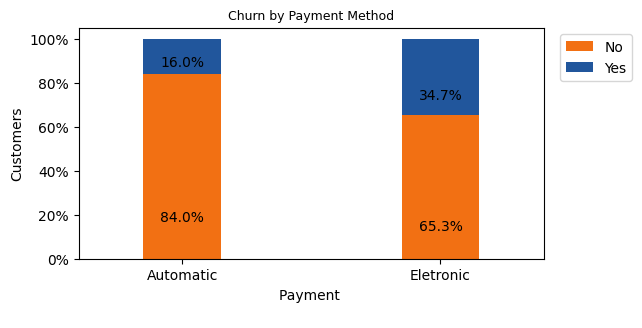

In [46]:
payment_churn = df2.groupby(['PaymentMethod','Churn']).size().unstack()
payment_churn.rename(columns={1:'Yes', 0:'No'}, inplace=True)

ax = (payment_churn.T*100.0 / payment_churn.T.sum()).T.plot(kind='bar', figsize=(6,3),width=0.3, color=colors,stacked=True, rot=0)

plt.title('Churn by Payment Method', fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='medium')
plt.xlabel('Payment \n', fontsize='medium')
plt.ylabel('Customers', fontsize='medium')
plt.xticks(fontsize='medium')
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

É possível perceber que o método de pagamento exerce uma leve influência no Churn. Clientes que realizam pagamentos por meio de cheques e boletos eletrônicos tendem a cancelar os seus contratos

## Cálculo do churn de receita
#####  A sigla MRR significa Monthly Recurring Revenue, ou a receita recorrente mensal.

Também chamado churn de receita, o MRR churn mostra a receita que você perdeu devido aos cancelamentos ou rebaixamentos durante um período. MRR churn destaca todos os movimentos que afetam a receita, tanto os clientes que cancelam os serviços quanto aqueles que reduzem seus gastos com eles.

Esta métrica é importante porque mostra o impacto financeiro de cada cancelamento, considerando que cada cliente contribui de maneira diferente para o negócio.

Em serviços de assinatura, é comum ter diferentes categorias com preços variados, o que pode aumentar ou diminuir o valor médio que cada cliente paga.

Além disso, produtos comprados em maior ou menor quantidade e serviços adicionais também podem influenciar no preço final.

###Cálculo da Receita Recorrente Mensal (MRR) para cada cliente e depois Calculo do valor de MRR perdido devido ao churn

In [47]:
df2['MRR'] = df2['MonthlyCharges']
total_mrr = df2['MRR'].sum()

churn_mrr = df2[df2['Churn'] == 'Yes']['MRR'].sum()

churn_rate = churn_mrr / total_mrr

#Total de receitas perdidas devido ao churn
total_revenue_lost = churn_rate * total_mrr
print("Total de receitas perdidas devido ao churn:", total_revenue_lost)

Total de receitas perdidas devido ao churn: 139130.85


O impacto com o churn dos clientes considerando toda a base é de uma perda de R$ 139.130,85 no valor total da receita (interpretado em reais por conta própria)

## Total de receitas perdidas devido ao churn nos primeiros 12 meses
### É filtrado para os primeiros 12 meses de contrato

In [48]:
df2_12 = df2[df2['tenure'] <= 12]

churn_mrr_by_month = df2_12[df2_12['Churn'] == 'Yes'].groupby('tenure')['MRR'].sum()


total_mrr_by_month = df2_12.groupby('tenure')['MRR'].sum()

#Calculo da taxa de rotatividade para cada mês
churn_rate_by_month = churn_mrr_by_month / total_mrr_by_month

#Total de receitas perdidas devido ao churn por mês
revenue_lost_by_month = churn_rate_by_month * total_mrr_by_month
print("Perda de receita mês a mês em função do churn:")
print(revenue_lost_by_month)

#Perda total de receitas nos primeiros 12 meses
total_revenue_lost = revenue_lost_by_month.sum()
print("Total de receitas perdidas devido ao churn nos primeiros 12 meses:", total_revenue_lost)

Perda de receita mês a mês em função do churn:
tenure
0          NaN
1     22115.00
2      8108.70
3      6205.00
4      5862.75
5      4561.25
6      3043.40
7      3833.95
8      3182.65
9      3234.15
10     3607.35
11     2268.10
12     2931.95
Name: MRR, dtype: float64
Total de receitas perdidas devido ao churn nos primeiros 12 meses: 68954.25


Considerando os primeiros 12 meses (período com maior concentração de perda de clientes), o impacto na receita é de uma perda de R$ 68.954,25 somente no primeiro ano, o que representa 49,56% da receita perdida com o Churn

## Visualização das Interseções - [UpSet Graph](https://upset.app/)

"O UpSet fornece uma maneira eficiente de visualizar interseções de múltiplos conjuntos em comparação com as abordagens tradicionais, ou seja, o Diagrama de Venn."

In [76]:
upset_customer = (df2[['Churn','PhoneService','InternetService', 'StreamingTV', 'StreamingMovies']]).copy()

upset_customer2= pd.get_dummies(upset_customer, columns=['Churn','PhoneService','InternetService', 'StreamingTV', 'StreamingMovies'])

In [77]:
upset_customer2 = upset_customer2.applymap(lambda x: True if x == 'Yes' else False if x == 'No' else x)

/tmp/ipython-input-1522042545.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  upset_customer2 = upset_customer2.applymap(lambda x: True if x == 'Yes' else False if x == 'No' else x)


In [78]:
upset_customer2 = upset_customer2.value_counts()

/usr/local/lib/python3.12/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/python3.12/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

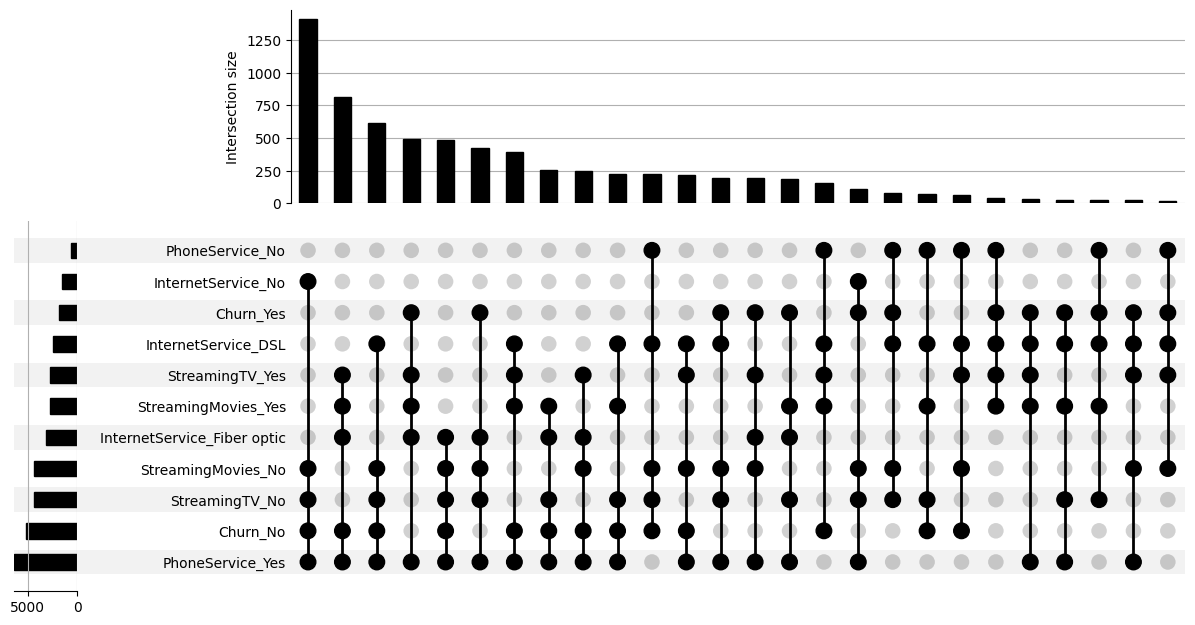

In [79]:
plot(upset_customer2, sort_by='cardinality')
plt.show()

Foi utilizada a biblioteca UpSet para compreender a relação entre um conjunto de variáveis.

O Resultado demonstra que:
*   Clientes que possuem apenas serviços de telefonia tendem a permanecerem
*   Em segundo lugar, pessoas com a cesta de serviços que inclui TV, filmes, internet fibra ótica e serviço de telefonia também tendem a permanecer, mas estão muito próximos daqueles que possuem a mesma cesta e realizam o churn

## Modelagem

In [80]:
df3 = customer.copy()

In [81]:
df3 = df3.drop(columns=['gender'], axis=1)
df3.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


A análise de sobrevivência é uma técnica estatística que consiste em analisar o tempo de vida dos indivíduos desde o momento em que entram no estudo até o momento em que ocorre o evento de interesse, evento que é definido à partida (geralmente definido como um fracasso), que pode ser a morte ou recaída de uma doença (para medicamentos) para casos aplicados à área da Saúde.

Sua principal aplicação é na medicina, envolvendo dados censurados. Porém, situações semelhantes ocorrem onde a aplicação destas técnicas é apropriada, especialmente em engenharia, ciências sociais, demografia, que podem ter como objeto de estudo, por exemplo: o tempo até que um carro tenha sua primeira avaria mecânica após ser vendido; o tempo desde que um criminoso sai da prisão até reincidir no crime ou mesmo a vida útil de uma máquina após a substituição de um componente mecânico.

## Estimador Kaplan-Meier
O Estimador Kaplan-Meier, também conhecido como estimador de limite de produto, pode ser usado para calcular probabilidades de sobrevivência para conjuntos de dados não paramétricos com múltiplas falhas e suspensões

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-1227774516.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Survival probability $\hat{S}(t)$")


Text(0.5, 0, 'time $t$')

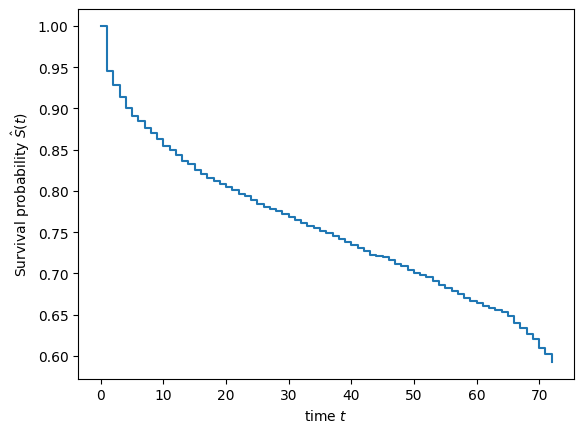

In [82]:
time, survival_prob = kaplan_meier_estimator(df3["Churn"].map({'Yes':True, 'No': False}), df3["tenure"])
plt.step(time, survival_prob, where="post")
plt.ylabel("Survival probability $\hat{S}(t)$")
plt.xlabel("time $t$")

A curva estimada é uma função gradual, com etapas ocorrendo em momentos em que um ou mais indivíduos tem os contratos cancelados. No gráfico podemos perceber que a permanência dos clientes é maior ao ultrapassar os primeiros 12 meses de contrato.
Entre o 1º e o 2º mês há uma queda de aproximadamente 5% da possibilidade de sobreviência destes clientes, despertando a necessidade de uma análise mais aprofundada para quem se encontra em início de contrato.

### Para entender esse comportamento, consideramos outras variáveis para, a seguir, comparar as curvas sobrevivência

In [83]:
col_cat = df3.select_dtypes(include="category").columns

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-3165890887.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("est. probability of survival $\hat{S}(t)$")


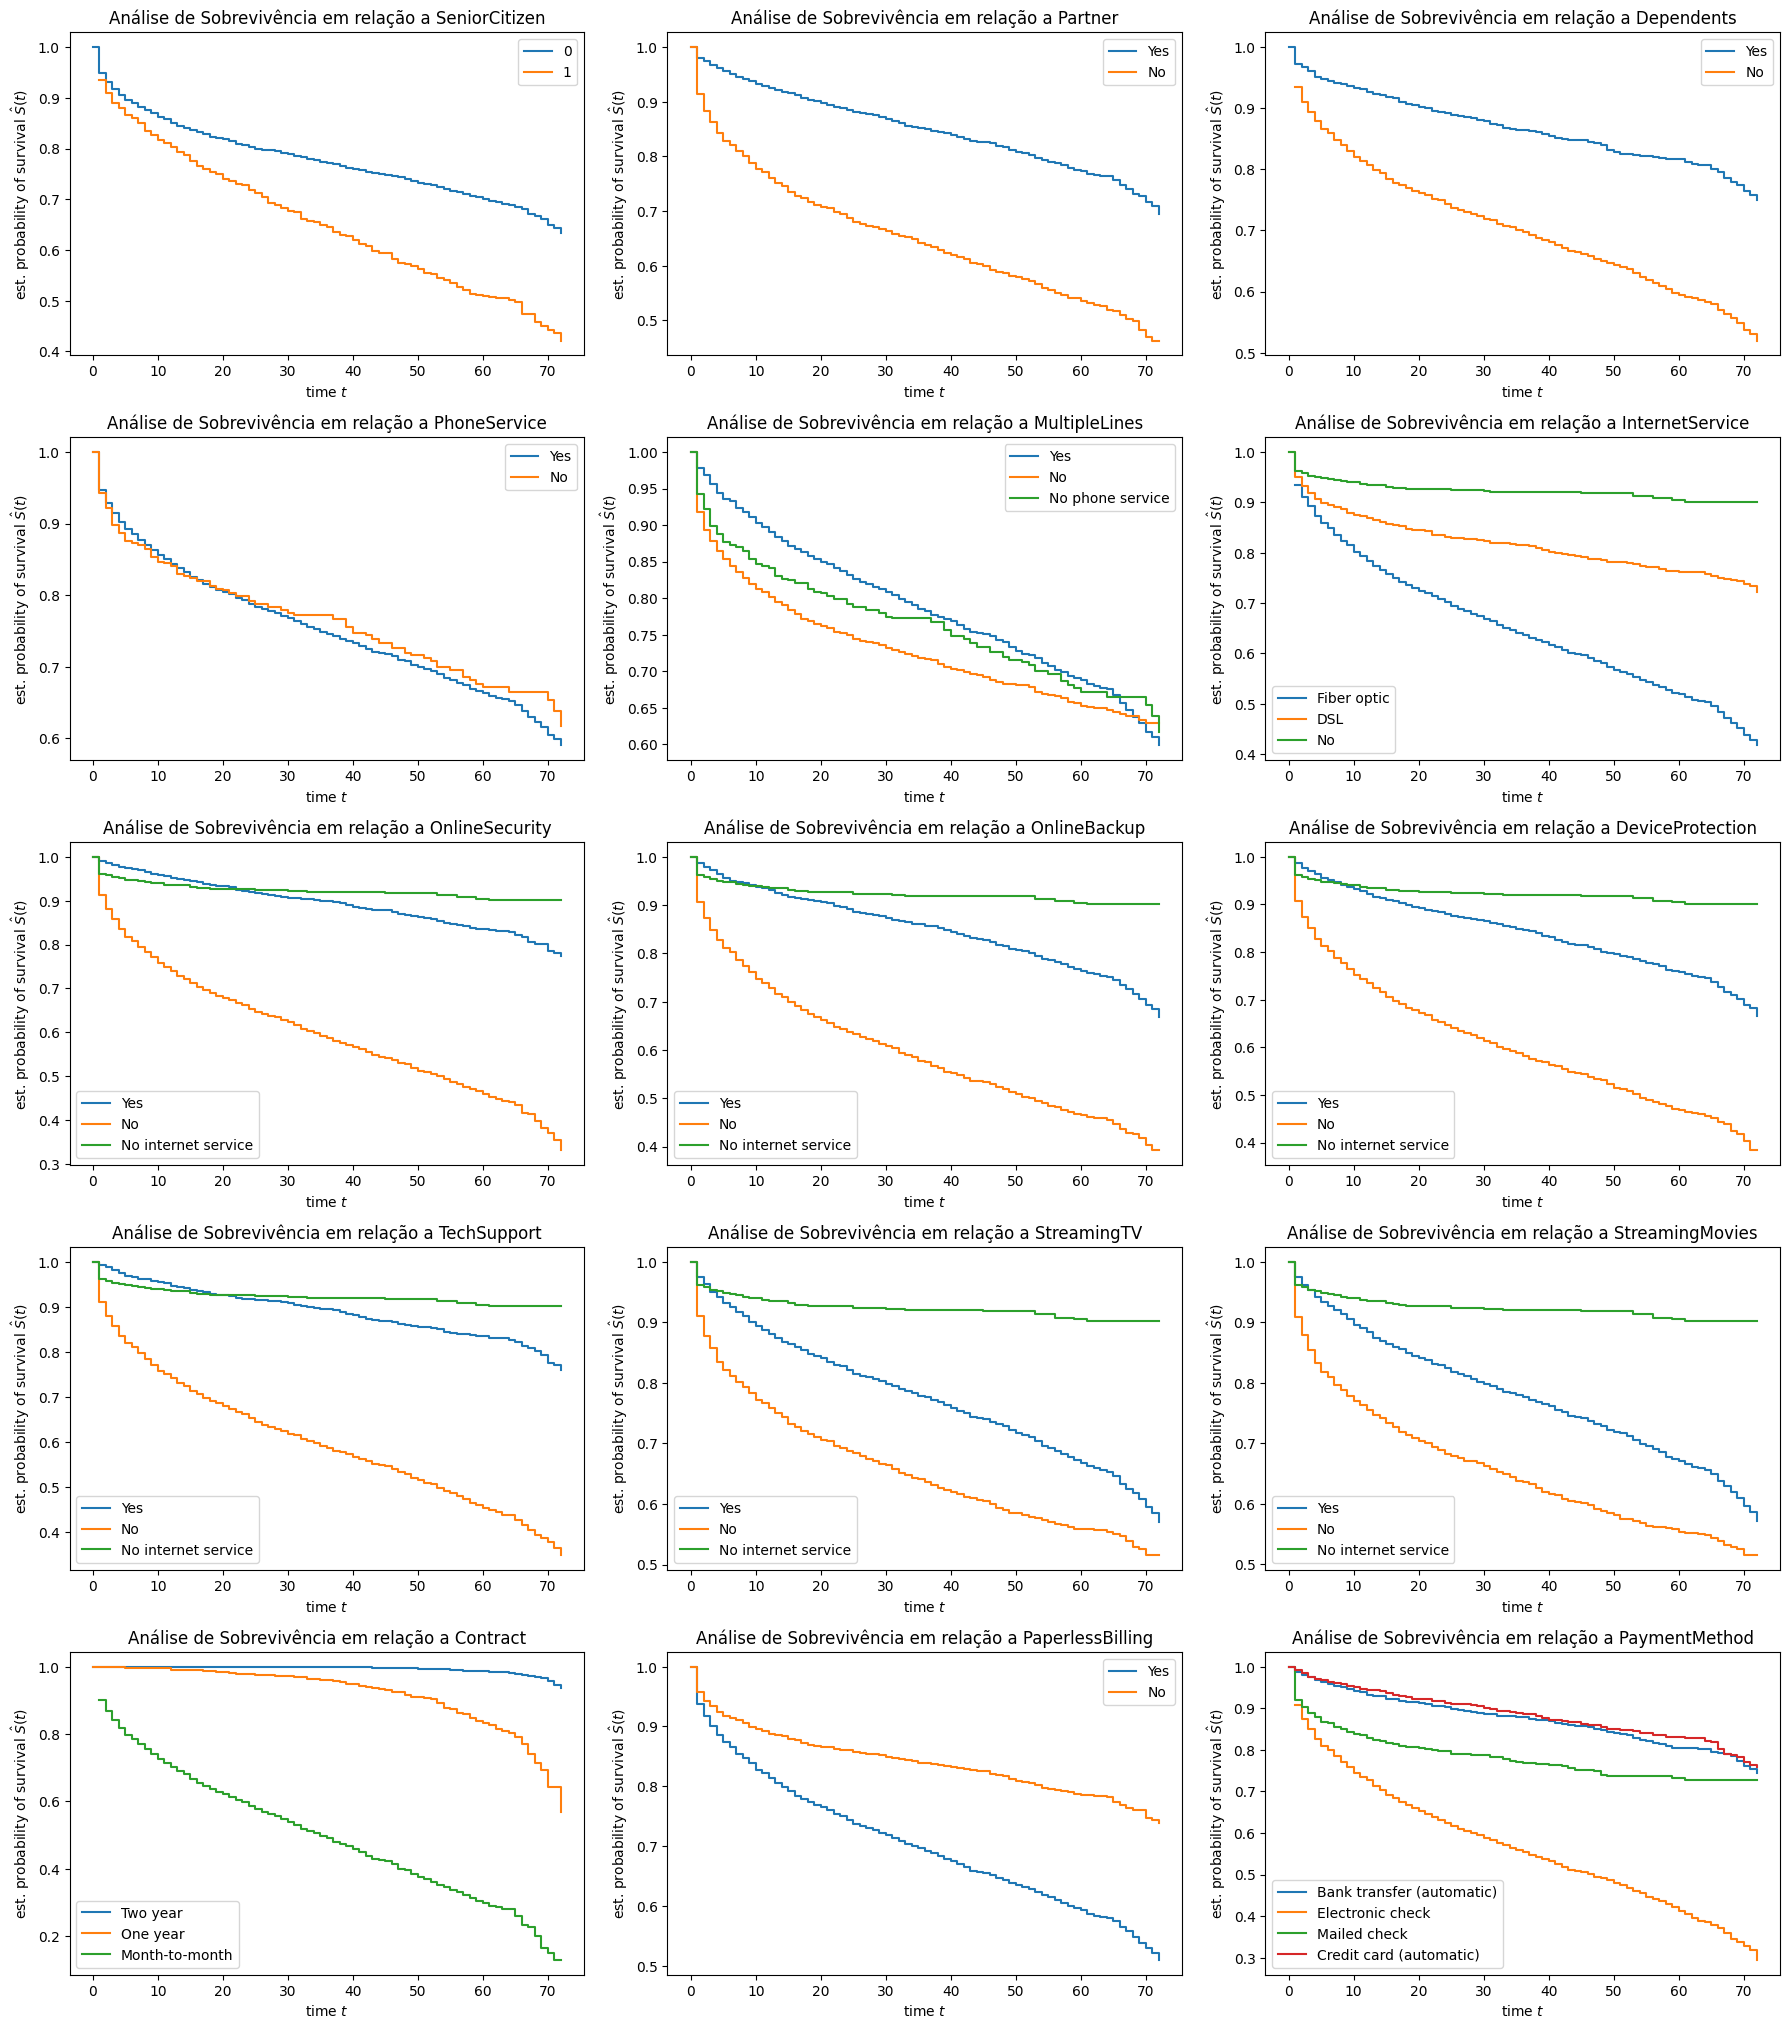

In [84]:
plt.figure(figsize=(18, 24))

for i, column in enumerate(col_cat[:-1], 1):
    plt.subplot(6, 3, i)

    for category in df3[column].unique():
        mask = df3[column] == category
        time, survival_prob = kaplan_meier_estimator(
            df3["Churn"][mask].map({'Yes':True, 'No': False}), df3["tenure"][mask])
        plt.step(time, survival_prob, where="post", label=category)

    plt.title(f"Análise de Sobrevivência em relação a {column}")
    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="best")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Modelo de Sobrevivência Multivariado - Cox Proportional Hazards Model

### Preparação dos dados
Para utilizar o modelo de riscos proporcionais de Cox, precisamos preparar os dados de forma que cada linha represente um cliente e cada coluna represente uma variável. Além disso, precisamos transformar as variáveis categóricas em variáveis dummy, ou seja, variáveis binárias que indicam a presença ou ausência de uma categoria.

A regressão de Cox constrói um modelo preditivo para dados de tempo até o evento. O modelo produz uma função de sobrevivência que prevê a probabilidade de o evento de interesse ter ocorrido em um determinado momento t para determinados valores das variáveis ​​preditoras. A forma da função de sobrevivência e os coeficientes de regressão para os preditores são estimados a partir de sujeitos observados; o modelo pode então ser aplicado a novos casos que possuem medidas para as variáveis ​​preditoras.

In [85]:
from sksurv.preprocessing import OneHotEncoder

bool_col = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

dummy_df = df3[col_cat].copy()

dummy_df['SeniorCitizen'] = dummy_df['SeniorCitizen'].astype(float)

for col in bool_col:
    dummy_df[col] = dummy_df[col].map({'Yes': 1, 'No': 0}).astype(float)

bool_col = list(set(col_cat) - set(bool_col) - set(['SeniorCitizen']))

dummy_df = pd.get_dummies(dummy_df, columns=bool_col, dtype=float)
dummy_df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [86]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   Partner                                  7043 non-null   float64
 2   Dependents                               7043 non-null   float64
 3   PhoneService                             7043 non-null   float64
 4   PaperlessBilling                         7043 non-null   float64
 5   Churn                                    7043 non-null   float64
 6   Contract_Month-to-month                  7043 non-null   float64
 7   Contract_One year                        7043 non-null   float64
 8   Contract_Two year                        7043 non-null   float64
 9   InternetService_DSL                      7043 non-null   float64
 10  InternetService_Fiber optic              7043 no

In [87]:
#Calculo da matriz de correlação
correlation_matrix = dummy_df.corr()

#Obtém as colunas a serem removidas (correlação igual a 1)
remove_cols = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) == 1:
            column = correlation_matrix.columns[j]
            remove_cols.append(column)


dummy_df = dummy_df.drop(columns=remove_cols)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   float64
 1   Partner                                  7043 non-null   float64
 2   Dependents                               7043 non-null   float64
 3   PhoneService                             7043 non-null   float64
 4   PaperlessBilling                         7043 non-null   float64
 5   Churn                                    7043 non-null   float64
 6   Contract_Month-to-month                  7043 non-null   float64
 7   Contract_One year                        7043 non-null   float64
 8   Contract_Two year                        7043 non-null   float64
 9   InternetService_DSL                      7043 non-null   float64
 10  InternetService_Fiber optic              7043 no

### Divisão dos dados em treino e teste

In [88]:
X = dummy_df.drop('Churn', axis=1)
df3['Churn'] = df3['Churn'].map({'Yes':True, 'No': False})
y = df3[['Churn', 'tenure']].to_records(index=False)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 30), (2113, 30), (4930,), (2113,))

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1695 to 860
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            4930 non-null   float64
 1   Partner                                  4930 non-null   float64
 2   Dependents                               4930 non-null   float64
 3   PhoneService                             4930 non-null   float64
 4   PaperlessBilling                         4930 non-null   float64
 5   Contract_Month-to-month                  4930 non-null   float64
 6   Contract_One year                        4930 non-null   float64
 7   Contract_Two year                        4930 non-null   float64
 8   InternetService_DSL                      4930 non-null   float64
 9   InternetService_Fiber optic              4930 non-null   float64
 10  InternetService_No                       4930 non-n

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px
#import streamlit as st

### Feature Importance

In [119]:
# Split the data into X & y


print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

(7043, 30)
(7043, 1)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [120]:
for i, column in enumerate(df3.drop('Churn', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi


# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

Importance of feature SeniorCitizen:, 0.031
Importance of feature Partner:, 0.037
Importance of feature Dependents:, 0.033
Importance of feature tenure:, 0.004
Importance of feature PhoneService:, 0.026
Importance of feature MultipleLines:, 0.379
Importance of feature InternetService:, 0.013
Importance of feature OnlineSecurity:, 0.009
Importance of feature OnlineBackup:, 0.000
Importance of feature DeviceProtection:, 0.112
Importance of feature TechSupport:, 0.000
Importance of feature StreamingTV:, 0.020
Importance of feature StreamingMovies:, 0.024
Importance of feature Contract:, 0.036
Importance of feature PaperlessBilling:, 0.012
Importance of feature PaymentMethod:, 0.007
Importance of feature MonthlyCharges:, 0.021
Importance of feature TotalCharges:, 0.010
Importance of feature Marital_Status:, 0.009


,index,Variable,Feature Importance Score
0,5,MultipleLines,0.379050
1,9,DeviceProtection,0.111874
2,1,Partner,0.037172
3,13,Contract,0.036003
4,2,Dependents,0.033244
5,0,SeniorCitizen,0.031285
6,4,PhoneService,0.026245
7,12,StreamingMovies,0.023913
8,16,MonthlyCharges,0.020821
9,11,StreamingTV,0.019646


In [121]:
# creating our Bar chart

# Sort feature importance DataFrame by 'Feature Importance Score'
final_fi_sorted = final_fi.sort_values(by='Feature Importance Score', ascending=True)

# Create interactive bar chart with Plotly
fig = px.bar(
    final_fi_sorted,
    x='Feature Importance Score',
    y='Variable',
    orientation='h',
    title="Feature Importance",
    labels={'Feature Importance Score': 'Importance', 'Variable': 'Feature'},
    text='Feature Importance Score',
    color_discrete_sequence=['#48a3b4']  # Custom bar color
)
fig.update_layout(
    xaxis_title="Feature Importance Score",
    yaxis_title="Variable",
    template="plotly_white",
    height=500
)
# st.plotly_chart(fig, use_container_width=True)

fig.show()

### Treinamento do modelo

In [91]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  #mostra a representação textual dos estimadores

estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.65351e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.1233e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.68541e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.53468e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.07196e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python

CoxPHSurvivalAnalysis()

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-1946769730.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("survival probability  $\hat{S}(t)$")


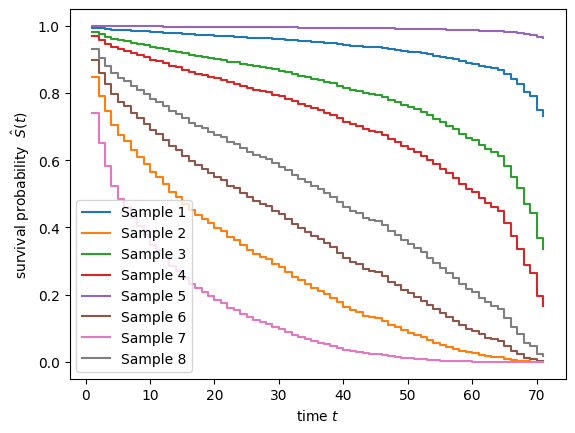

In [92]:
pred_surv = estimator.predict_survival_function(X_test[:8])
time_points = np.arange(1, 72)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post",
             label="Sample %d" % (i + 1))
plt.ylabel("survival probability  $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [93]:
X_test_samples = X_test[:8]
y_test_samples = y_test[:8]

##### Para testar o modelo, selecionamos 8 elementos do conjunto de testes e realizamos apredição dos mesmos. É possivel observar que o "Sample 8" é o que mais se aproxima de um comportamento de sobrevivência linear e, quanto maior o tenure, menor a probabilidade de sobrevivência. Este comportamento pode indicar que o cliente precisará de alguma intervenção para evitar o churn ao longo do tempo.
##### Na literatura, não foi encontrado um método direto para estimar o número de conjuntos (sample) utilizados. No entanto, existem algumas referências para as áreas médicas ao utilizar o modelo, que podem ser encontradas nos links a seguir:
*   [Sample Size - Survival Analysis](https://www.quesgen.com/SSSurvival.php)
*   [Sample Size Calculators for designing clinical research](https://sample-size.net/sample-size-survival-analysis/)



### Avaliação do modelo
Nossos dados de teste geralmente estão sujeitos à censura, assim como dados médicos, portanto, métricas como erro médio quadrático ou correlação são inadequadas. Em vez disso, utilizamos uma generalização da área sob a curva da característica de operação do receptor (ROC) chamada índice de concordância de Harrell ou c-index.

A interpretação é idêntica à métrica tradicional da área sob a curva ROC para classificação binária:

*   um valor de 0,5 indica um modelo aleatório,
*   um valor de 1,0 indica um modelo perfeito,
*   um valor de 0,0 indica um modelo perfeitamente incorreto.



In [94]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(X_train)
result = concordance_index_censored(
    y_train['Churn'], y_train['tenure'], prediction)

result[0]

np.float64(0.8629872836715571)

In [95]:
prediction = estimator.predict(X_test)
result = concordance_index_censored(
    y_test['Churn'], y_test['tenure'], prediction)

result[0]

np.float64(0.8722393280323001)

Na avaliação do modelo, obtivemos um c-index de 86,29% para os dados de treinamento e 87,22% para os dados de teste, indicando que o modelo possui uma boa capacidade de prever o tempo de ocorrência do evento.

### Matriz de Confusão


In [96]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score, f1_score

# Horizonte em meses para binarizar sobrevivência
H = 12

# Rótulos binários no Horizonte H
y_true_train = (y_train["Churn"] & (y_train["tenure"] <= H)).astype(int)
y_true_test = (y_test["Churn"] & (y_test["tenure"] <= H)).astype(int)

# scores contínuos do Cox (risco relativo)
scores_train = estimator.predict(X_train)
scores_test = estimator.predict(X_test)

# Normaliza para [0,1], ajudando a estabilidade da curv PR
s_min, s_max = scores_train.min(), scores_train.max()
scores_train_n = (scores_train - s_min) / (s_max - s_min + 1e-12)
scores_test_n = (scores_test - s_min) / (s_max - s_min + 1e-12)

# Limiar que maximiza F1 no treino
prec, rec, ths = precision_recall_curve(y_true_train, scores_train_n)
f1s = (2 * prec * rec) / (prec + rec + 1e-12)

# Precision_recall_curve retorna um threshold
ths_full = np.r_[0.0, ths]
best_idx = np.nanargmax(f1s)
threshold = ths_full[best_idx]

print(f"Limiar ótimo (F1) no treino: {threshold:.6f} | F1(max) = {f1s[best_idx]:4f}")

# Binariza com o limiar e avalia
y_pred_train = (scores_train_n >= threshold).astype(int)
y_pred_test = (scores_test_n >= threshold).astype(int)

# Matriz de confusão com ordem fixa [0, 1]
cm_train = confusion_matrix(y_true_train, y_pred_train, labels=[0, 1])
cm_test = confusion_matrix(y_true_test, y_pred_test, labels=[0, 1])

print("\n Treinamento")
print(cm_train)
print(classification_report(y_true_train, y_pred_train, target_names=[f"no churn <= {H}", f"churn <= {H}"]))

print("\n Teste")
print(cm_test)
print(classification_report(y_true_test, y_pred_test, target_names=[f"no churn <= {H}", f"churn <= {H}"]))

# distribuição das predições
unique_train = np.unique(y_pred_train, return_counts=True)
unique_test = np.unique(y_pred_test, return_counts=True)
print("\nDistribuição predições (train): ", dict(zip(unique_train[0], unique_train[1])))
print("Distribuição predições (test): ", dict(zip(unique_test[0], unique_test[1])))

Limiar ótimo (F1) no treino: 0.852285 | F1(max) = 0.517661

 Treinamento
[[3648  554]
 [ 281  447]]
                precision    recall  f1-score   support

no churn <= 12       0.93      0.87      0.90      4202
   churn <= 12       0.45      0.61      0.52       728

      accuracy                           0.83      4930
     macro avg       0.69      0.74      0.71      4930
  weighted avg       0.86      0.83      0.84      4930


 Teste
[[1546  258]
 [ 106  203]]
                precision    recall  f1-score   support

no churn <= 12       0.94      0.86      0.89      1804
   churn <= 12       0.44      0.66      0.53       309

      accuracy                           0.83      2113
     macro avg       0.69      0.76      0.71      2113
  weighted avg       0.86      0.83      0.84      2113


Distribuição predições (train):  {np.int64(0): np.int64(3929), np.int64(1): np.int64(1001)}
Distribuição predições (test):  {np.int64(0): np.int64(1652), np.int64(1): np.int64(461)}


Nas matrizes de confusão, percebe-se que o modelo é muito bom em identificar aqueles clientes que não devem ter churn, porém, não está tendo um igual desempenho em identificar os churn, uma vez que as classes estão bem desbalanceadas.


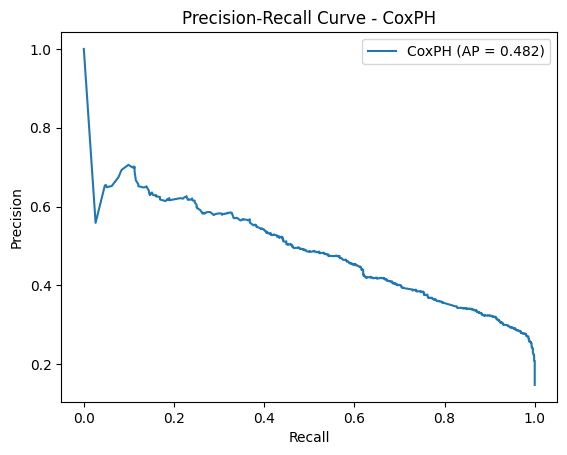

In [97]:
prec_cox, rec_cox, _ = precision_recall_curve(y_true_test, scores_test_n)
ap_cox = average_precision_score(y_true_test, scores_test_n)

plt.plot(rec, prec, label=f"CoxPH (AP = {ap_cox:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - CoxPH")
plt.legend()
plt.show()

In [98]:
prediction = estimator.predict(X_test)
result = concordance_index_censored(
    y_test['Churn'], y_test['tenure'], prediction)

result[0]

np.float64(0.8722393280323001)

Na avaliação do modelo, obtivemos um c-index de 86,29% para os dados de treinamento e 87,22% para os dados de teste, indicando que o modelo possui uma boa capacidade de prever o tempo de ocorrência do evento.



### Explicabilidade do modelo
##### O modelo de análise de sobrevivência foi treinado considerando todas as variáveis disponíveis no conjunto de dados.
##### No entanto, é possível que algumas variáveis não sejam relevantes para a previsão do tempo de ocorrência do evento. Para identificar quais variáveis individualmente são as melhores preditoras de risco de churn, é possível treinar o modelo de riscos proporcionais de Cox para cada variável e comparar o c-index de cada modelo

In [99]:
def score_features(X, y):
    n_features = X.shape[1]
    score = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        score[j] = m.score(Xj, y)
    return score


score = score_features(X_train.values, y_train)
pd.Series(score, index=X_train.columns).sort_values(ascending=False)

,0
Contract_Month-to-month,0.759711
TechSupport_No,0.678630
OnlineSecurity_No,0.677150
OnlineBackup_No,0.664813
Contract_Two year,0.659729
DeviceProtection_No,0.656938
PaymentMethod_Electronic check,0.641078
Partner,0.629097
TechSupport_Yes,0.611473
InternetService_Fiber optic,0.610044


##### A partir da análise proposta, é possível identificar que as variáveis "Contract", "PaymentMethod", "OnlineSecurity", "TechSupport", "InternetService" e "OnlineBackup" possuem os melhores c-index e, portanto, se destacam como as melhores preditoras de risco para churn. Nestes casos, pode ser interessante utilizar estas variáveis para novas modelagens para explorar melhor a importância e peso de cada uma delas na movimentação do cliente.


##### Observa-se ainda que as variáveis "MultipleLines_No phone service", "PhoneService" e "PaymentMethod_Mailed check" apresentaram um c-index muito próximo do valor 0,5 o que, baseado na literaratura, poderia ser descartadas no modelo de forma a simplificar a análise. O fato de a variável PaymentMethod_Mailed check não ser uma boa preditora de risco de churn sugere ter relação com o fato de haver um comportamento de churn maior nos dois primeiros meses

# Regressão Logística

In [100]:
X = dummy_df.drop('Churn', axis=1)
y = df3[['Churn']].values

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 30), (2113, 30), (4930, 1), (2113, 1))

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1695 to 860
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            4930 non-null   float64
 1   Partner                                  4930 non-null   float64
 2   Dependents                               4930 non-null   float64
 3   PhoneService                             4930 non-null   float64
 4   PaperlessBilling                         4930 non-null   float64
 5   Contract_Month-to-month                  4930 non-null   float64
 6   Contract_One year                        4930 non-null   float64
 7   Contract_Two year                        4930 non-null   float64
 8   InternetService_DSL                      4930 non-null   float64
 9   InternetService_Fiber optic              4930 non-null   float64
 10  InternetService_No                       4930 non-n

In [103]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
estimator.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [104]:
# Matriz de treino
y_pred_train = estimator.predict(X_train)
print("Treinamento")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

# Matriz de teste
y_pred = estimator.predict(X_test)
print("\nTeste")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Treinamento
[[3207  407]
 [ 630  686]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      3614
        True       0.63      0.52      0.57      1316

    accuracy                           0.79      4930
   macro avg       0.73      0.70      0.72      4930
weighted avg       0.78      0.79      0.78      4930


Teste
[[1360  200]
 [ 257  296]]
              precision    recall  f1-score   support

       False       0.84      0.87      0.86      1560
        True       0.60      0.54      0.56       553

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113



Comparando as matrizes tanto para treino quanto para teste, vemos que não há uma diferença alta no report, indicando que o modelo está generalizando bem para dados não vistos

In [105]:
# Cross-Validation e Hiper-parâmetros
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

estimator = LogisticRegression(max_iter=2000, class_weight='balanced')
grid = GridSearchCV(estimator, param_grid, cv=cv, scoring='f1', n_jobs=-1, refit=True)
grid.fit(X_train, y_train)

print("Melhor F1 (CV):", grid.best_score_)
print("Melhores params:", grid.best_params_)

# avaliando no treino
y_pred_train = grid.best_estimator_.predict(X_train)
print("\nTreino")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

# avaliando no teste
y_pred = grid.best_estimator_.predict(X_test)
print("\nTeste")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Melhor F1 (CV): 0.6131001271287468
Melhores params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Treino
[[2557 1057]
 [ 261 1055]]
              precision    recall  f1-score   support

       False       0.91      0.71      0.80      3614
        True       0.50      0.80      0.62      1316

    accuracy                           0.73      4930
   macro avg       0.70      0.75      0.71      4930
weighted avg       0.80      0.73      0.75      4930


Teste
[[1099  461]
 [ 109  444]]
              precision    recall  f1-score   support

       False       0.91      0.70      0.79      1560
        True       0.49      0.80      0.61       553

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.75      2113



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mesmo após fazendo o Cross-Validation e o K-Fold, o desempenho com do modelo de Regressão não teve performance melhorada com a busca de hiper-parâmetros


In [106]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true_log = y_test.values.ravel() if hasattr(y_test, "values") else y_test.ravel()
proba_log = grid.best_estimator_.predict_proba(X_test)[:, 1]
prec_log, rec_log, _ = precision_recall_curve(y_true_log, proba_log)
ap_log = average_precision_score(y_true_log, proba_log)

LOG_PR = {
    "y_true": y_true_log,
    "proba": proba_log,
    "precision": prec_log,
    "recall": rec_log,
    "AP": ap_log,
}

## Curva Precion-Recall


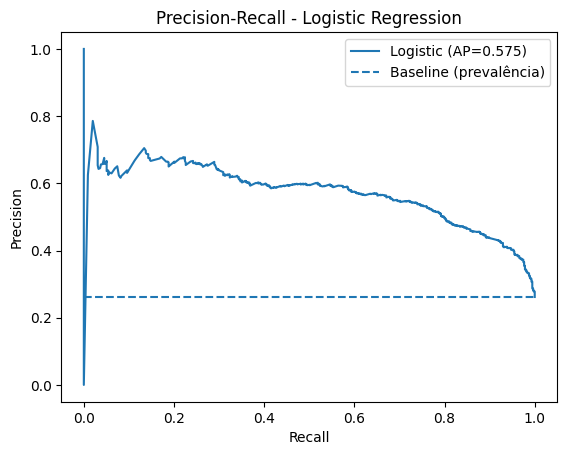

In [107]:
plt.plot(LOG_PR['recall'], LOG_PR['precision'], label=f"Logistic (AP={LOG_PR['AP']:.3f})")
plt.hlines(LOG_PR['y_true'].mean(), 0, 1, linestyles="dashed", label="Baseline (prevalência)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall - Logistic Regression")
plt.legend()
plt.show()

## Explicabilidade do modelo


Ao compararmos a implementação de uma simples Regressão Logística com a sua busca por hiper-parâmetros, percebemos que após o GridSearchCV, otimizando para F1, este aumentou de 0.56 -> 0.61, devido ao aumento do Recall churn para 0.80, à custa de reduzir a precisão (mais falsos positivos) e cair a acurácia global.


Isso não é inesperado, pois ao pedirmos a otimização do F1, o modelo "aceitou" errar mais nos não-churn para equilibrar melhor a precisão e recall da classe churn.

## Comparação dos modelos


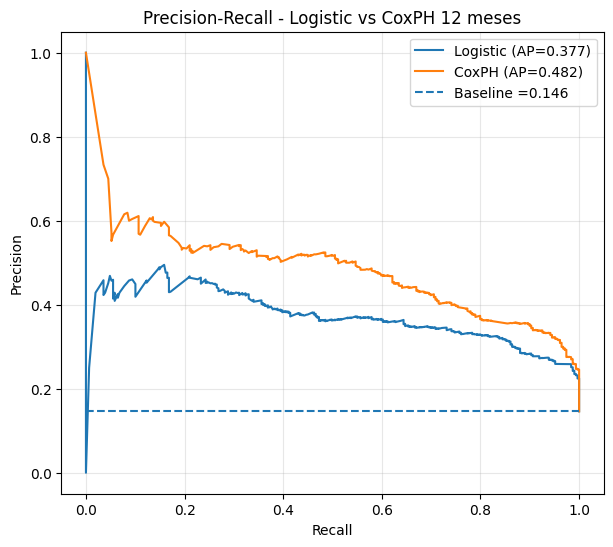

In [108]:
y_true_H = ((df3.loc[X_test.index, "Churn"].astype(int) == 1) &
            (df3.loc[X_test.index, "tenure"].astype(float) <= H)).astype(int).to_numpy()

prec_cox, rec_cox, _ = precision_recall_curve(y_true_H, scores_test_n)
ap_cox = average_precision_score(y_true_H, scores_test_n)

prec_log, rec_log, _ = precision_recall_curve(y_true_H, proba_log)
ap_log = average_precision_score(y_true_H, proba_log)

baseline = y_true_H.mean()

plt.figure(figsize=(7, 6))
plt.plot(rec_log, prec_log, label=f"Logistic (AP={ap_log:.3f})")
plt.plot(rec_cox, prec_cox, label=f"CoxPH (AP={ap_cox:.3f})")
plt.hlines(baseline, 0, 1, linestyles="dashed", label=f"Baseline ={baseline:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall - Logistic vs CoxPH {H} meses")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Conclusão


Ambos os modelos estão acima do baseline, com o sobrevivência CoxPH tendo uma área maior sob a curva, mantendo mais precisão para os mesmos níveis de recall. O baseline indica que somente 14,6% dos clientes de fato cancelaram o serviço em até 1 ano, e o CoxPH ficou muito acima desta linha.


Com o Average Precision de 0.482 contra 0.377. O CoxPH gerou scores mais informativos para separar clientes de alto risco, especialmente em um cenário desbalanceado (baseline 0.146). O modelo de Logística oscilou bastante no início e caiu mais rápido, mostrando que teve dificuldade em balancear recall alto com precisão aceitável.


Para decisões de negócio em até 1 ano, o modelo CoxPH seria a melhor escolha.

## Estimativa de impacto de intervenções
### Estimativa do impacto ao realizar intervenções na proposta de contratos de longo prazo

In [109]:
df_contrato_longo_prazo = df3[(df3['Contract'] != 'One year') | (df3['Contract'] != 'Two year')]
df_contrato_longo_prazo = df_contrato_longo_prazo[df_contrato_longo_prazo['Churn'] == True]
df_contrato_longo_prazo = df_contrato_longo_prazo[['tenure', 'MonthlyCharges', 'TotalCharges']]
ticket_medio_df_contrato_longo_prazo = df_contrato_longo_prazo['MonthlyCharges'].mean()

ticket_medio_df_contrato_longo_prazo

np.float64(74.44133226324237)

In [110]:
impacto_longo_prazo = df_contrato_longo_prazo.count()
impacto_longo_prazo

,0
tenure,1869
MonthlyCharges,1869
TotalCharges,1869


In [111]:
impacto_longo_prazo = ticket_medio_df_contrato_longo_prazo * (impacto_longo_prazo * 0.05)

impacto_longo_prazo

,0
tenure,6956.5425
MonthlyCharges,6956.5425
TotalCharges,6956.5425


##Estimativa de impacto ao realizar intervenções na proposta de pessoas com família


In [112]:
df3['Marital_Status'] = df3.apply(lambda x: "Single" if x['Partner'] == "No" and x['Dependents'] == "No" else "Family", axis=1)

In [113]:
df_familia = df3[df3['Marital_Status'] == 'Family']
df_familia = df_familia[df_familia['Churn'] == True]
df_familia = df_familia[['tenure', 'MonthlyCharges', 'TotalCharges']]
ticket_medio_familia = df_familia['MonthlyCharges'].mean()
ticket_medio_familia

np.float64(78.31796246648793)

In [114]:
contratos_familia = df_familia.count()
contratos_familia

,0
tenure,746
MonthlyCharges,746
TotalCharges,746


In [115]:
impacto_familia = ticket_medio_familia * (contratos_familia * 0.05)
impacto_familia

,0
tenure,2921.26
MonthlyCharges,2921.26
TotalCharges,2921.26


## Sugestões de próximas ações:
Como proposta de melhorias e continuidade deste trabalho, para um prazo de curto prazo sugiro aprofundarem fatores causadores do Churn que pode ser a experiência do cliente, do valor para pacotes de serviços e entrega dos serviços.

## Referências

*  Bradburn, M., Clark, T., Love, S. et al. Survival Analysis Part III: Multivariate data analysis – choosing a model and assessing its adequacy and fit. Br J Cancer 89, 605–611 (2003). https://doi.org/10.1038/sj.bjc.6601120

*  FIA. Churn Rate: o que é e como reter mais cliente. (2020). https://fia.com.br/blog/churn-rate/
*   Magul, Eudito. Churn Customers: Survival Analysis Applying R. (2023). https://medium.com/@euditomagul/churn-customers-survival-analysis-applying-r-fe09df4c93cc
*   Goel MK, Khanna P, Kishore J. Understanding survival analysis: Kaplan-Meier estimate. Int J Ayurveda Res. 2010 Oct;1(4):274-8. doi: 10.4103/0974-7788.76794. PMID: 21455458; PMCID: PMC3059453. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/#:~:text=may%20become%20small.-,The%20Kaplan%2DMeier%20estimate%20is%20the%20simplest%20way%20of%20computing,associated%20with%20subjects%20or%20situations.&text=For%20each%20time%20interval%2C%20survival,number%20of%20patients%20at%20risk



